In [13]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df = pd.read_csv('/content/drive/MyDrive/Simulation Project/Data from privacy_survey - privacy_survey.csv')
df.head()

,Timestamp,Age,Privacy,Consent
0,2025/05/01 12:00:00 AM GMT+6,36–45,Friends-only (or equivalent platform-specific ...,No
1,2025/05/01 12:01:00 AM GMT+6,18–25,Public,No
2,2025/05/01 12:02:00 AM GMT+6,18–25,Public,Yes
3,2025/05/01 12:03:00 AM GMT+6,26–35,Public,No
4,2025/05/01 12:04:00 AM GMT+6,36–45,Friends-only (or equivalent platform-specific ...,Yes


In [ ]:
# Simplify the long label in the Privacy column
df['Privacy'] = df['Privacy'].replace(
    'Friends-only (or equivalent platform-specific setting)',
    'Friends-Only'
)

In [ ]:
contingency_table = pd.crosstab(df['Age'], df['Privacy'])
print("Contingency Table:\n")
print(contingency_table)

Contingency Table:

Privacy  Friends-Only  Public
Age                          
18–25              85      97
26–35             110     108
36–45             109      91


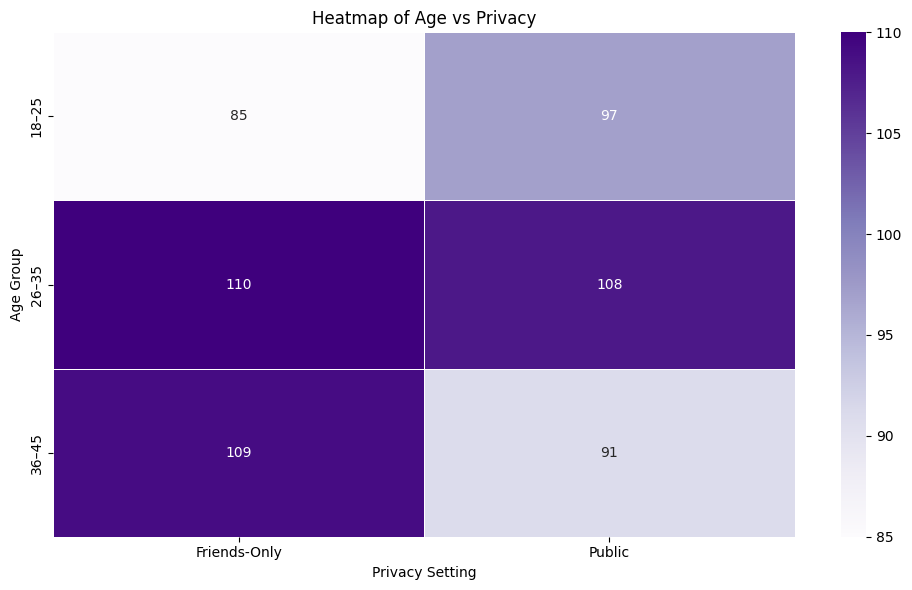

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="Purples", fmt='d', linewidths=.5)
plt.title('Heatmap of Age vs Privacy')
plt.ylabel('Age Group')
plt.xlabel('Privacy Setting')
plt.tight_layout()
plt.show()

In [18]:
#Chi-square test

observed = contingency_table.values
total = np.sum(observed)
row_totals = observed.sum(axis=1).reshape(-1, 1)
col_totals = observed.sum(axis=0).reshape(1, -1)
expected = row_totals @ col_totals / total
chi_square_stat = np.sum(((observed - expected) ** 2) / expected)
print(row_totals)

[[182]
 [218]
 [200]]


In [ ]:
#Degrees of freedom and statistical values

df_degrees = (observed.shape[0] - 1) * (observed.shape[1] - 1)
alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, df_degrees)
p_value = 1 - stats.chi2.cdf(chi_square_stat, df_degrees)

In [ ]:
#Results

print(f'\nChi-square statistic: {chi_square_stat:.2f}')
print(f'Degrees of freedom: {df_degrees}')
print(f'Critical value (0.05 significance level): {critical_value:.2f}')
print(f'P-value: {p_value:.4f}')


Chi-square statistic: 2.32
Degrees of freedom: 2
Critical value (0.05 significance level): 5.99
P-value: 0.3130


In [ ]:
#Conclusion
if chi_square_stat > critical_value:
    print("Reject the null hypothesis. Age and Privacy settings are related.")
else:
    print("Fail to reject the null hypothesis. Age and Privacy settings are independent.")

Fail to reject the null hypothesis. Age and Privacy settings are independent.


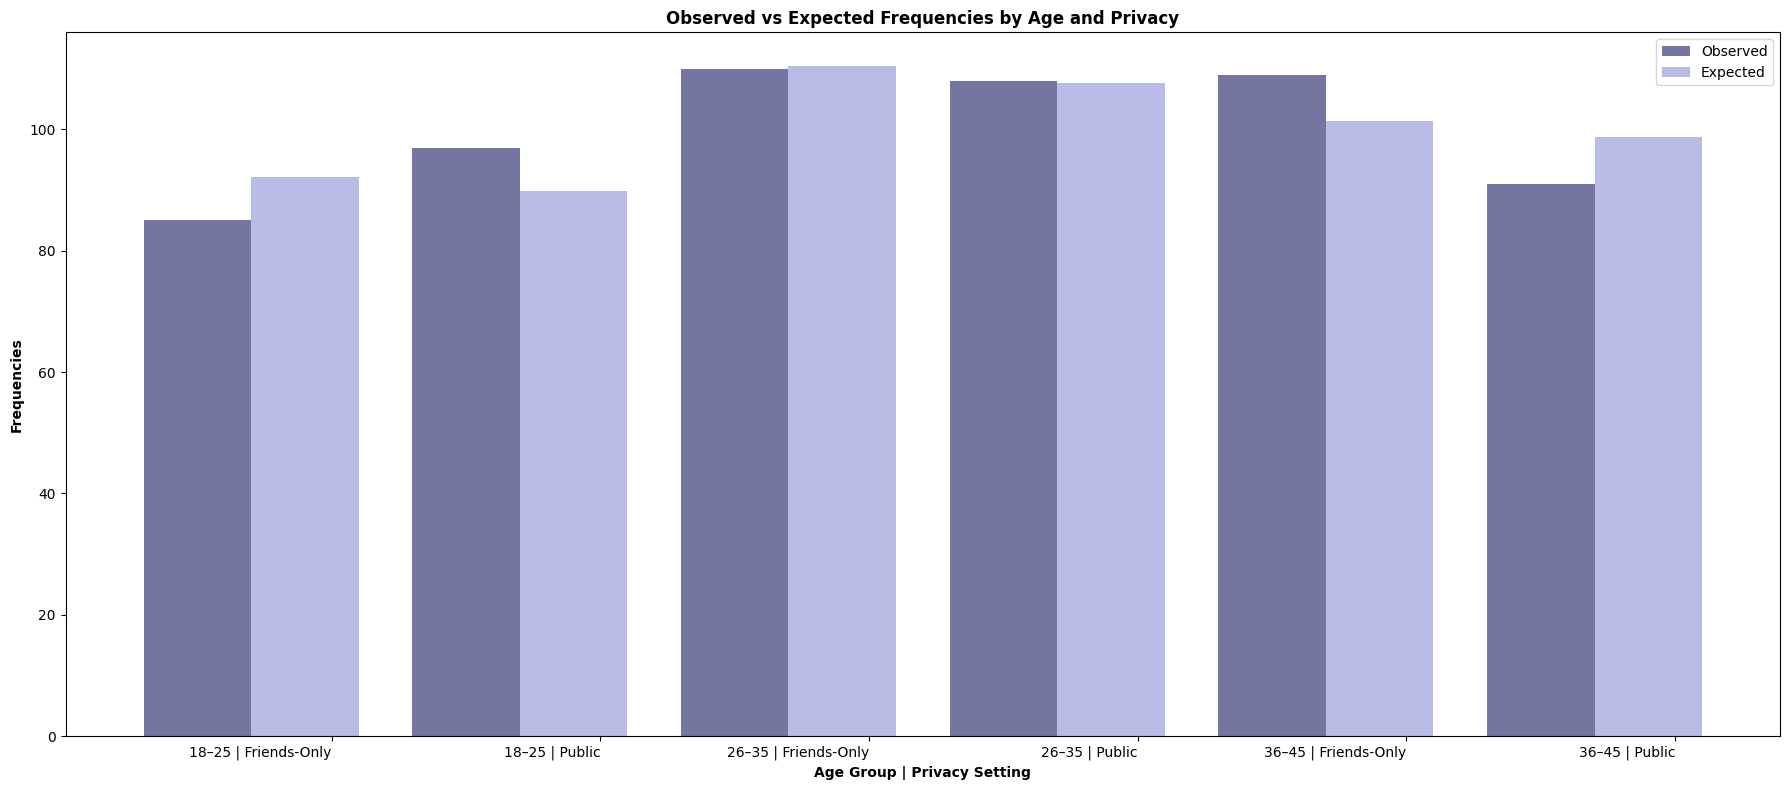

In [ ]:
# Color customization
observed_color = '#393b79'
expected_color = '#9c9ede'

# Flatten observed and expected for plotting
observed_flat = observed.flatten()
expected_flat = expected.flatten()

# Generate category labels
labels = [f"{age} | {privacy}" for age in contingency_table.index for privacy in contingency_table.columns]
x = np.arange(len(labels))

# Plotting
plt.figure(figsize=(18, 8))
plt.bar(x, observed_flat, width=0.4, label='Observed', alpha=0.7, color=observed_color)
plt.bar(x + 0.4, expected_flat, width=0.4, label='Expected', alpha=0.7, color=expected_color)

# Custom x-axis labels centered under each pair
plt.xticks(ticks=x + 0.5, labels=labels, rotation=0, ha='right', fontsize=10,)

# Labels and title
plt.xlabel('Age Group | Privacy Setting', fontweight='bold')
plt.ylabel('Frequencies', fontweight='bold')
plt.title('Observed vs Expected Frequencies by Age and Privacy', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()
